# 1. 목표설정  
> 다음 분기에 어떤 게임을 설계해야 할까?  

* 주요 질문
> 1. 지역에 따라서 선호하는 게임 장르가 다를까?
> 2. 연도별 게임의 트렌드가 있을까?
> 3. 매출이 높은 게임에 대한 분석 및 시각화  

# 2. 필요 라이브러리 설치

In [3]:
# 라이브러리 설치

import pandas as pd
import numpy as np
from scipy import stats

In [4]:
# 시각화 라이브러리 설치

# # 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

# 2. Data Preprocessing

In [5]:
url = 'https://raw.githubusercontent.com/Liam427/stuydy-data/main/data/vgames2.csv'
df = pd.read_csv(url, index_col = 0)
print(df.shape)
df.head()

(16598, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


데이터프레임은 총 16598행과 9열으로 이루어져 있습니다.

* Name : 게임의 이름입니다
* Platform : 게임이 지원되는 플랫폼의 이름입니다.  
* Year : 게임이 출시된 연도입니다.  
* Genre : 게임의 장르입니다.  
* Publisher : 게임을 제작한 회사입니다.  
* NA_Sales : 북미 매출액입니다.  
* EU_Sales : 유럽 매출액입니다.  
* JP_Sales : 일본 매출액입니다.  
* Other_Sales : 기타지역 매출액입니다.


In [6]:
# 데이터타입 확인

df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

* Year은 수치형 데이터로 잘 되어있고,  
Name, Genre, Publisher는 범주형 데이터로 잘 저장이되어 있습니다.  
하지만 수치형 데이터로 되어있어야 한 각 지역의 매출액 데이터가  
범주형 데이터로 저장되어 있으므로 수치형 데이터로 변환해야 함을 알 수 있습니다.

In [7]:
# 데이터 유일값 확인

df['Name'].value_counts().sum()

16598

* value_counts라는 함수를 써서 데이터프레임 중에 중복되는 게임.  
즉, 증복되는 인덱스가 있는지 확인을 해보았으나 16598개로 같은 개수를 보이며  
중복되는 인덱스가 없음을 알 수 있습니다.

In [8]:
# 각 열의 결측치 확인

df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

* 결측치(= 존재하지 않는 값)를 확인해 분석시 오류가 나는 것을 방지하기로 했습니다.  
결측치를 확인해보니 Year=271개, Genre=50개, Publisher=58개가 각각 있음을 알 수 있고 이 결측치를 어떻게 처리 할지 고민을 했습니다. 

In [9]:
# Year의 결측치 삭제

df.dropna(subset = ['Year'], inplace = True)
df['Year'].isnull().sum()

0

* Year의 결측치는 271개로 많으나 저희가 보유한 데이터 역시 17000여개로  
결측치가 1.7%가량 이기 때문에 결측치들을 삭제 해주기로 했습니다.

In [10]:
# Genre의 결측치 삭제

df.dropna(subset = ['Genre'], inplace = True)
df['Genre'].isnull().sum()

0

* Genre의 결측치는 Year의 결측치보다 적은 50개 이므로 이또한 삭제 해주었습니다.  
그리고 검색을 해서도 이게임의 정확한 Genre를 분별하지 못할 것 같아, 분석에 혼란을 주기 싫어서 삭제해 주었습니다.

In [11]:
# 분석에 따로 큰 지장이 없는 Publisher의 결측치를 unknown으로 일치시킴

df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Publisher'].isnull().sum()

0

* Publisher는 게임 발행회사 혹은 게임 제작사입니다. 우리의 궁극적 목표인 다음분기에 어떤게임을 설계해야 할까에 대한 전혀영향을 미치는 사항이 없어 보이고, 제가 분석을 위한 로드맵을 그렸을때 중요하지 않은 열 이라 생각해 삭제 하려 했지만 결측치 이외에 Unknown이라는 모르는값도 존재 하기에 결측치 또한 Unknown으로 일치 시켜 줬습니다.

In [12]:
# Year은 float형 일 필요가 없이 int형으로 교체

df['Year'] = df['Year'].astype('int')

In [13]:
# Year 데이터 보완

for i in range(100 + 1):
    if 0 <= i < 10 :
        df['Year'] = df['Year'].replace(i, '200' + str(i))
    elif 10 <= i < 21:
        df['Year'] = df['Year'].replace(i, '20' + str(i))
    elif 21 <= i < 100:
        df['Year'] = df['Year'].replace(i, '19' + str(i))

df['Year'] = pd.to_numeric(df['Year'])

* Year 열의 데이터를 확인해 보던중 연도기재의 미비로인해 이상치가 많이발견되어 추측하여 합당한 연도를 만들어 주기 위해 함수를 꾸며 봤습니다.  
    * 1자리의 숫자만 있는경우 200x를 만들어 주기 위해 문자열로 200을 더해 주었습니다.  
    * 2자리의 숫자중 10 ~ 20인 경우 20xx를 만들어 주기 위해 문자열로 20을 더해 주었습니다.  
    * 2자리의 숫자중 21 ~ 99인 경우 19xx를 만들어 주기 위해 문자열로 19를 더해 주었습니다.  

* 지금 전체의 연도는 문자열 이기 때문에 마지막에 숫자형으로 바꿔 주었습니다.

In [14]:
# 각지역의 매출액 단위 일치

Sales1 = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i in Sales1:
    df[i] = (df[i].replace(r'[KM]+$', '', regex = True).astype(float) * 
             df[i].str.extract(r'[\d\.]+([KM]+)', expand = False)
             .fillna(1)
             .replace(['K','M'], [1/1000, 1*0]).astype(float))

* 매출액데이터를 살펴보니 단위가 일치 하지 않고 중간중간에 M,K등 문자열이 섞여 있는걸로 보입니다.  
그래서 M은 문자를 지워 줬고, K는 1000을 나눠 주었습니다. 아래는 예시 입니다.
    * 0.57M → 0.57  
    * 300K → 0.3 
    * 출처 : https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe


In [15]:
# EDA들어가기전 마지막 type확인

df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

* 최종적으로 숫자형데이터는 int와 float로 바뀌었고 범주형데이터는 문자형으로 되었습니다.

# 2. Exploratory Data Analysis & Data Visualization

In [16]:
# 전처리가 끝난 데이터 불러오기

print(df.shape)
df.head()

(16277, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


* 데이터 전처리를 하면 결측치를 삭제해줘서 16598개 → 16277개로 데이터가 줄었지만  
분석하는데 크게 영향이 없을거라 생각을 합니다.

In [17]:
# Global_Sales

df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


* 각 지역별 매출을 더해 Global_Sales라는 column을 추가하여 세계매출 총합을 고려하였습니다.

In [18]:
# 데이터 통계량 확인

df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,2006.407630,0.262304,0.146023,0.077353,0.047909,0.533588
std,5.828646,0.815212,0.506386,0.306786,0.189402,1.549215
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


* 데이터의 대략적인 통계량을 확인하여 추후 시각화를 위한 자료를 추가하였습니다.  
    * 각 지역중 평균이 가장 큰 지역은 북미(NA)지역으로 나오고 가장 작은 지역은 기타(Other)지역으로 보입니다.  
    * 각 지역중 가장 큰 값이 가장 큰 지역역시 북미(NA)이나 가장 작은 지역은 일본(JP)지역으로 보입니다.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


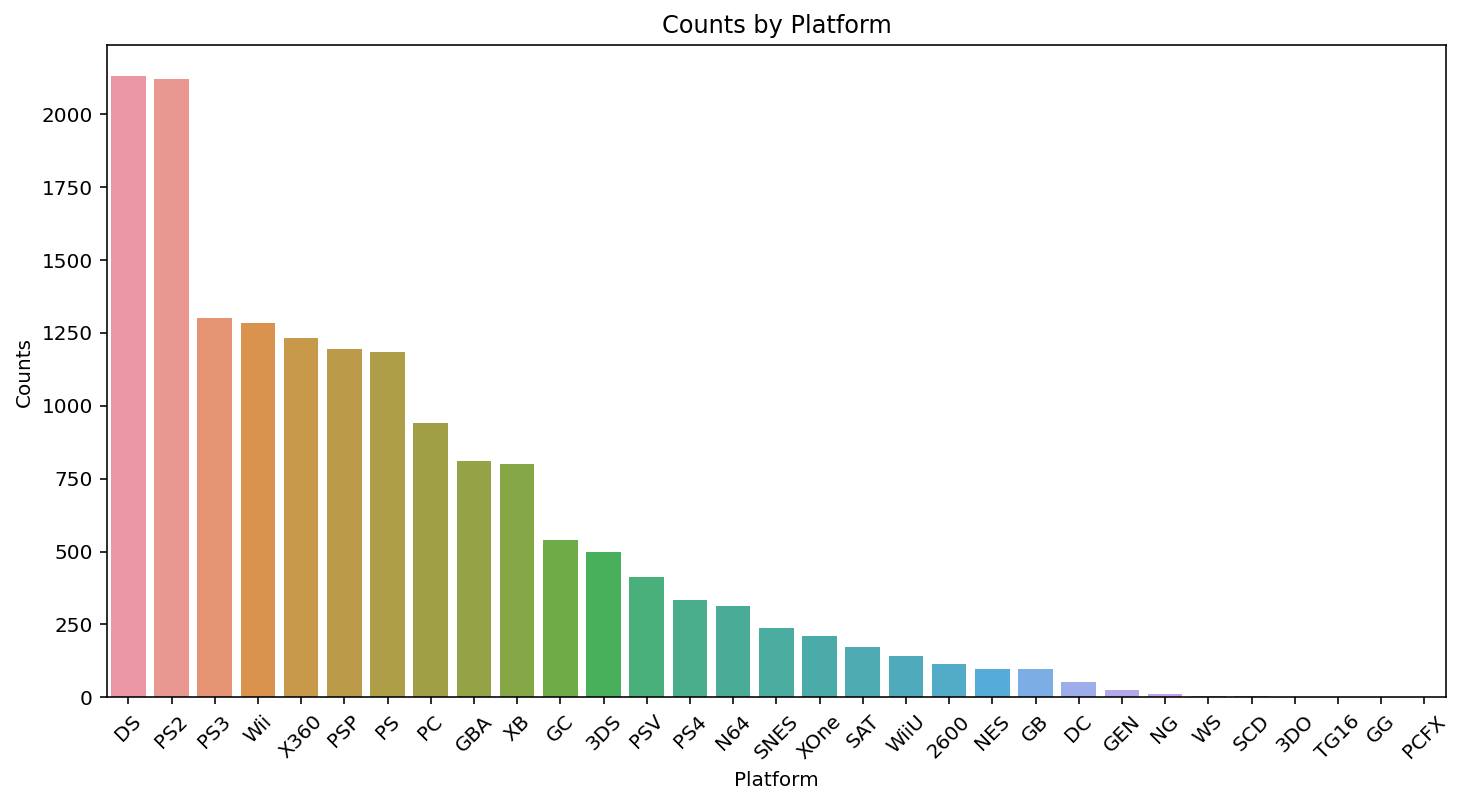

In [19]:
# Platform coulmn으로 barplot 그려보기

df_platform_counts = pd.DataFrame(df['Platform'].value_counts()).reset_index()
df_platform_counts.rename(columns = {'index':'Platform', 'Platform':'Counts'}, inplace = True)

plt.figure(figsize = (12, 6))
sns.barplot(data = df_platform_counts, x = 'Platform', y = 'Counts')
plt.xticks(rotation = 45)
plt.title('Counts by Platform')
plt.show();

* 16000여 게임이 이용하는 Platform 중 가장 많은 이용 Platform은 DS(Nintendo DS)와 PS2가 근소한 차이로 1, 2위를 다투고 있고 PS3, Wii, X360등이 뒤를 잇고 있습니다.

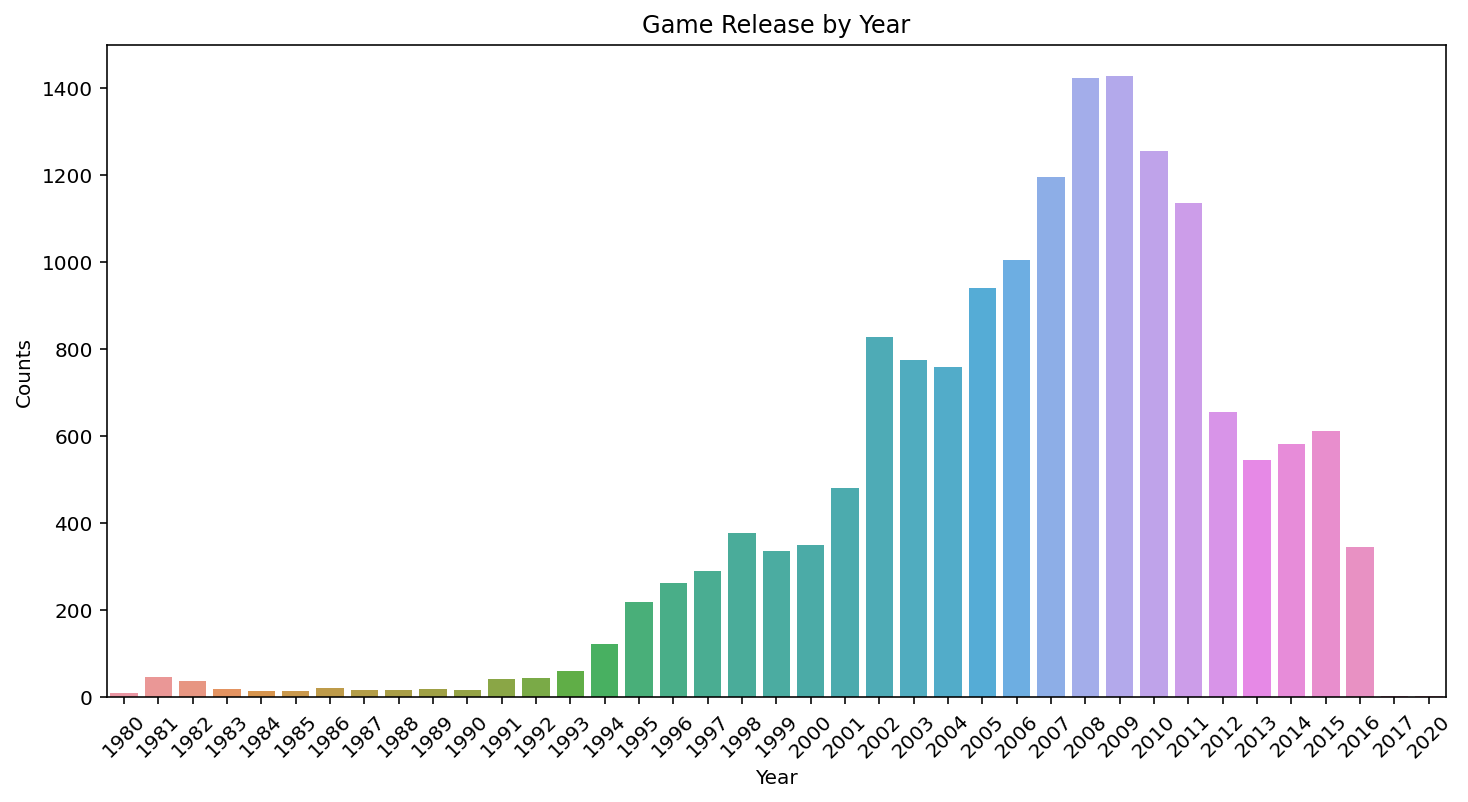

In [20]:
# Year coulmn으로 barplot 그려보기

df_year_counts = pd.DataFrame(df['Year'].value_counts()).reset_index()
df_year_counts.rename(columns = {'index':'Year', 'Year':'Counts'}, inplace = True)

plt.figure(figsize = (12, 6))
sns.barplot(data = df_year_counts, x = 'Year', y = 'Counts')
plt.xticks(rotation = 45)
plt.title('Game Release by Year')
plt.show();

* 1980년 부터 꾸준하게 증가세를 보이며. 2008년과 2009년에 가장 많은 게임이 출시된것을 알수 있습니다.  
* 아래에서 설명 하겠지만 콘솔형게임이 전체 시장에서의 비중이 적어짐에 따라  
2008년, 2009년 을 기점으로 출시하는 게임의 수가 줄어듦을 보입니다.

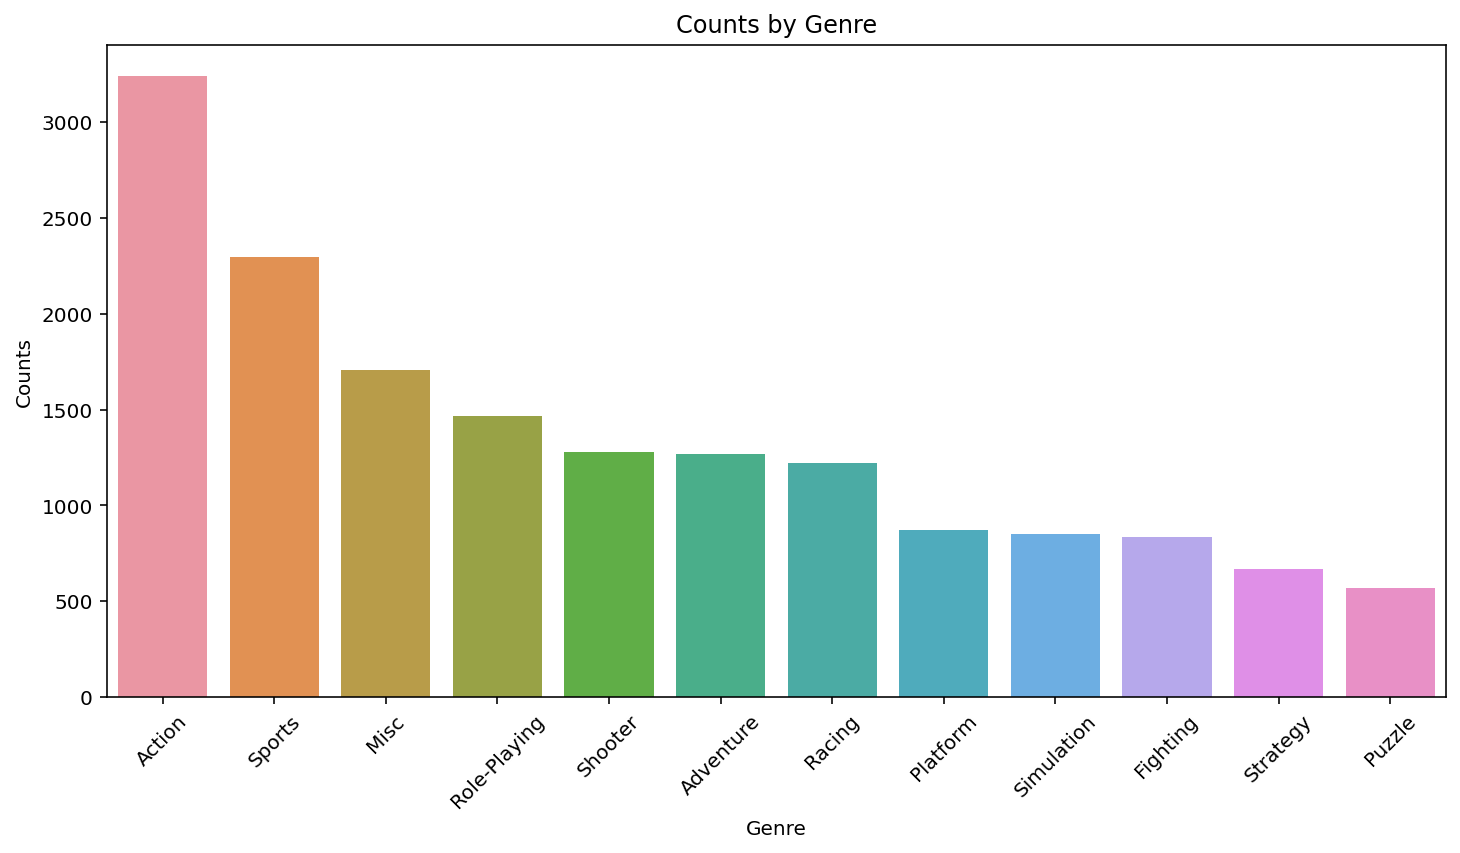

In [21]:
# Genre coulmn으로 barplot 그려보기

df_genre_counts = pd.DataFrame(df['Genre'].value_counts()).reset_index()
df_genre_counts.rename(columns = {'index':'Genre', 'Genre':'Counts'}, inplace = True)

plt.figure(figsize = (12, 6))
sns.barplot(data = df_genre_counts, x = 'Genre', y = 'Counts')
plt.xticks(rotation = 45)
plt.title('Counts by Genre')
plt.show();

* 데이터 수집 처음부터 2020년 마지막까지 가장많이 출시한 장르는 Action이고 Sports, Misc, Role-Playing 순으로 그 뒤를 따르고 있습니다.

In [22]:
# Name과 Globla Sales간의 barplot 그려보기

df_name_global = df.groupby(by = ['Name'])['Global_Sales'].sum().reset_index()
df_name_global = df_name_global.sort_values(by = ['Global_Sales'], ascending=False).head(15)

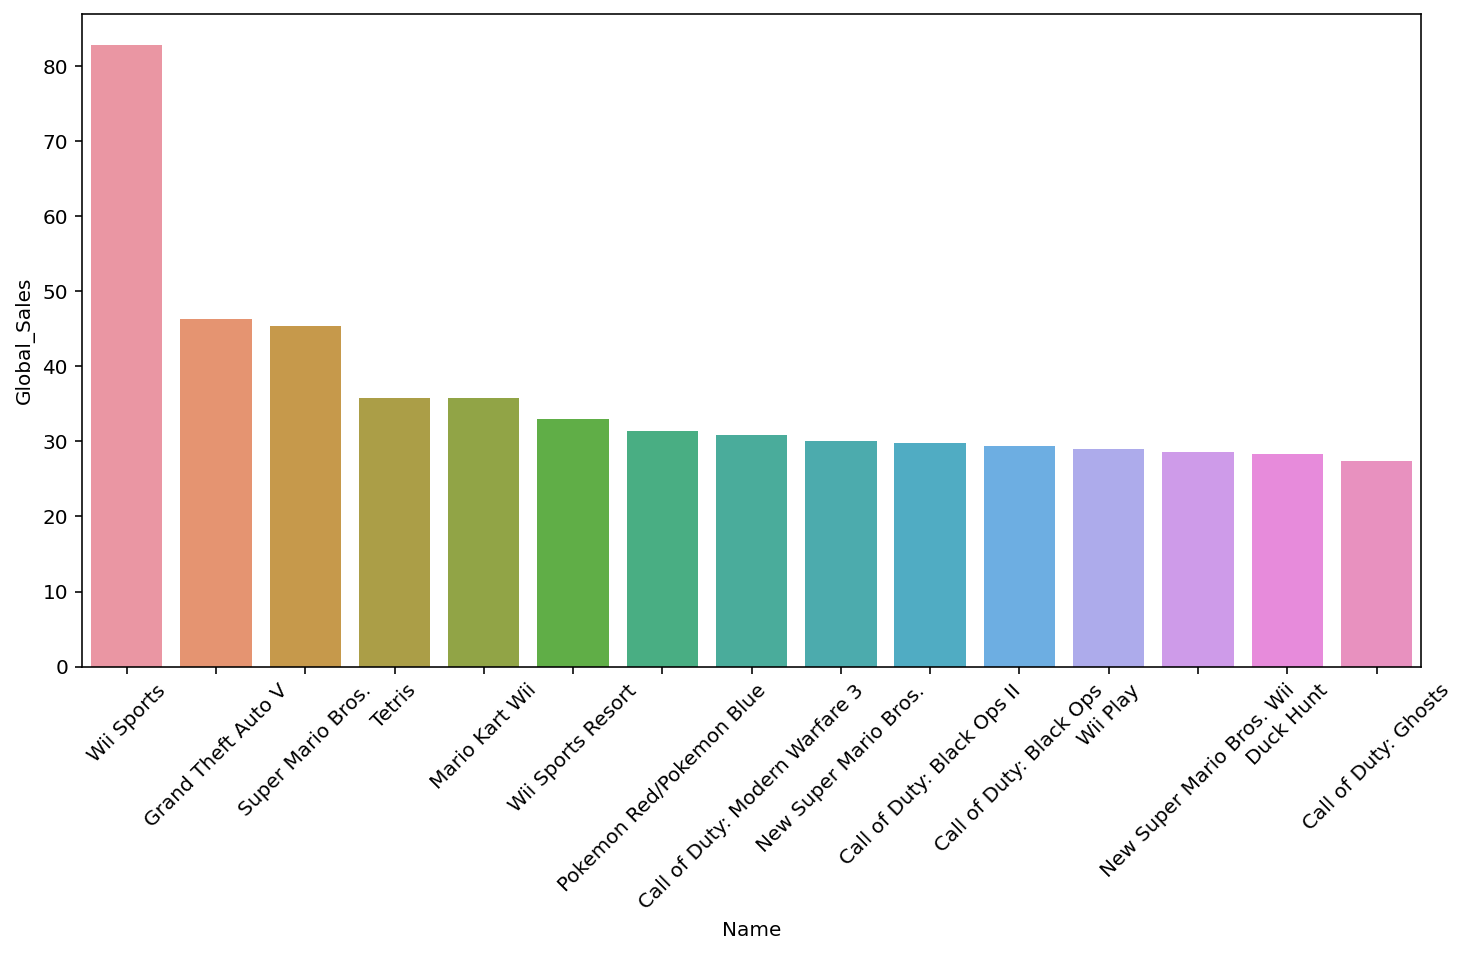

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data = df_name_global, x = 'Name', y = 'Global_Sales')
plt.xticks(rotation = 45)
plt.show();

* 각 게임의 세계적인 매출액 순위를 한눈에 보기 위해 barplot을 그렸습니다.  
* 그러기 위해 groupby 함수를 썻고, 매출액이 큰 순서부터 표현하기 위해 sort_values라는 함수를 이용하였습니다.  
* 그 결과 Wii Sports 가 82.74 만큼 Global Sales를 올렸고, Grand Theft Auto V 가 46.29 만큼으로 그 뒤를 이었고,  
Super Mario Bros. 가 45.31으로 3위를 차지 했습니다.

In [24]:
# Platform과 Global Sales간의 barplot 그려보기

df_platform_global = df.groupby(by = ['Platform'])['Global_Sales'].sum().reset_index()
df_platform_global = df_platform_global.sort_values(by = ['Global_Sales'], ascending=False)

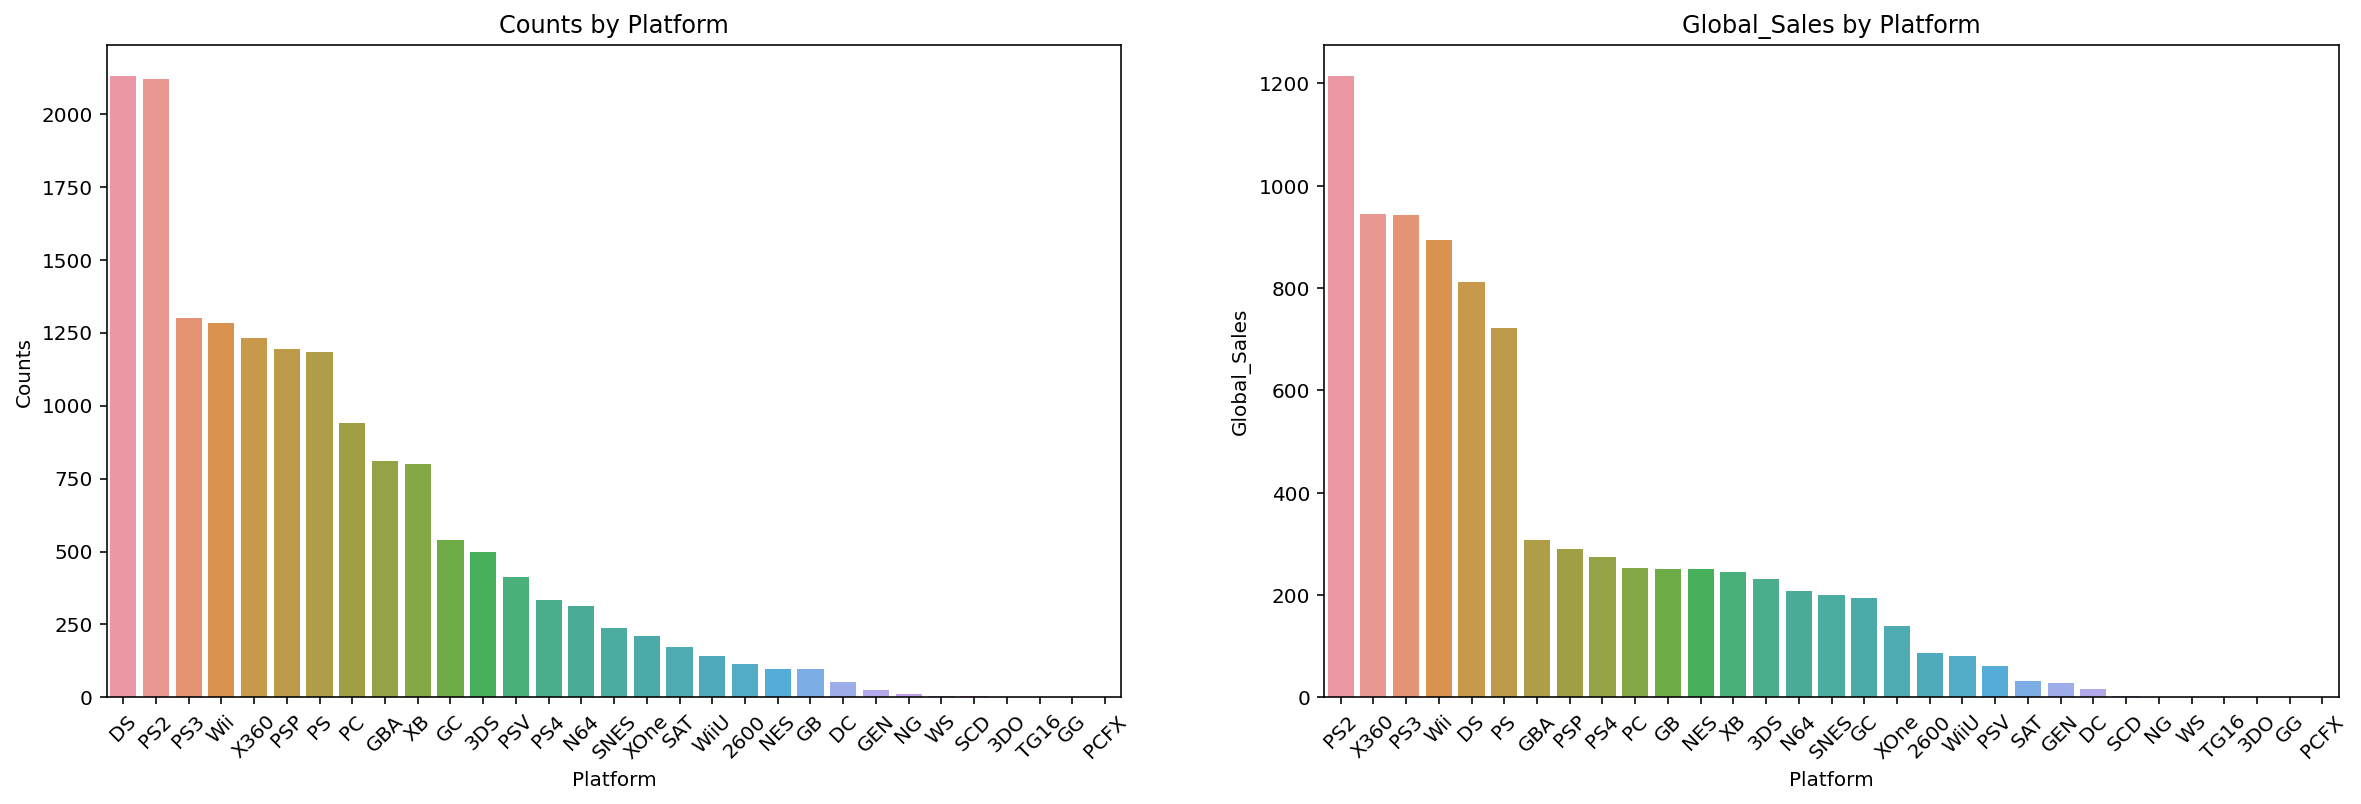

In [51]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.barplot(data = df_platform_counts, x = 'Platform', y = 'Counts')
plt.xticks(rotation = 45)
plt.title('Counts by Platform')

plt.subplot(122)
sns.barplot(data = df_platform_global, x = "Platform", y = "Global_Sales")
plt.xticks(rotation = 45)
plt.title('Global_Sales by Platform')

plt.show();

* 각 Platform의 세계적인 매출액 순위를 한눈에 보기 위해 barplot을 그렸습니다.  
* 그러기 위해 groupby 함수를 썻고, 매출액이 큰 순서부터 표현하기 위해 sort_values라는 함수를 이용하였습니다.  
* 왼쪽의 그래프는 이미 앞에서 살펴본바 있는 Platform에서 출시된 게임을 단순 카운트만 한 그래프이고 오른쪽의 그래프는 출시후 판매되어 매출을 올린 그래프입니다. 
* 이둘을 살펴 보면 출시된 게임의 수와 매출을 올린 Platform의 순위가 다르다는 것을 알 수 있습니다.

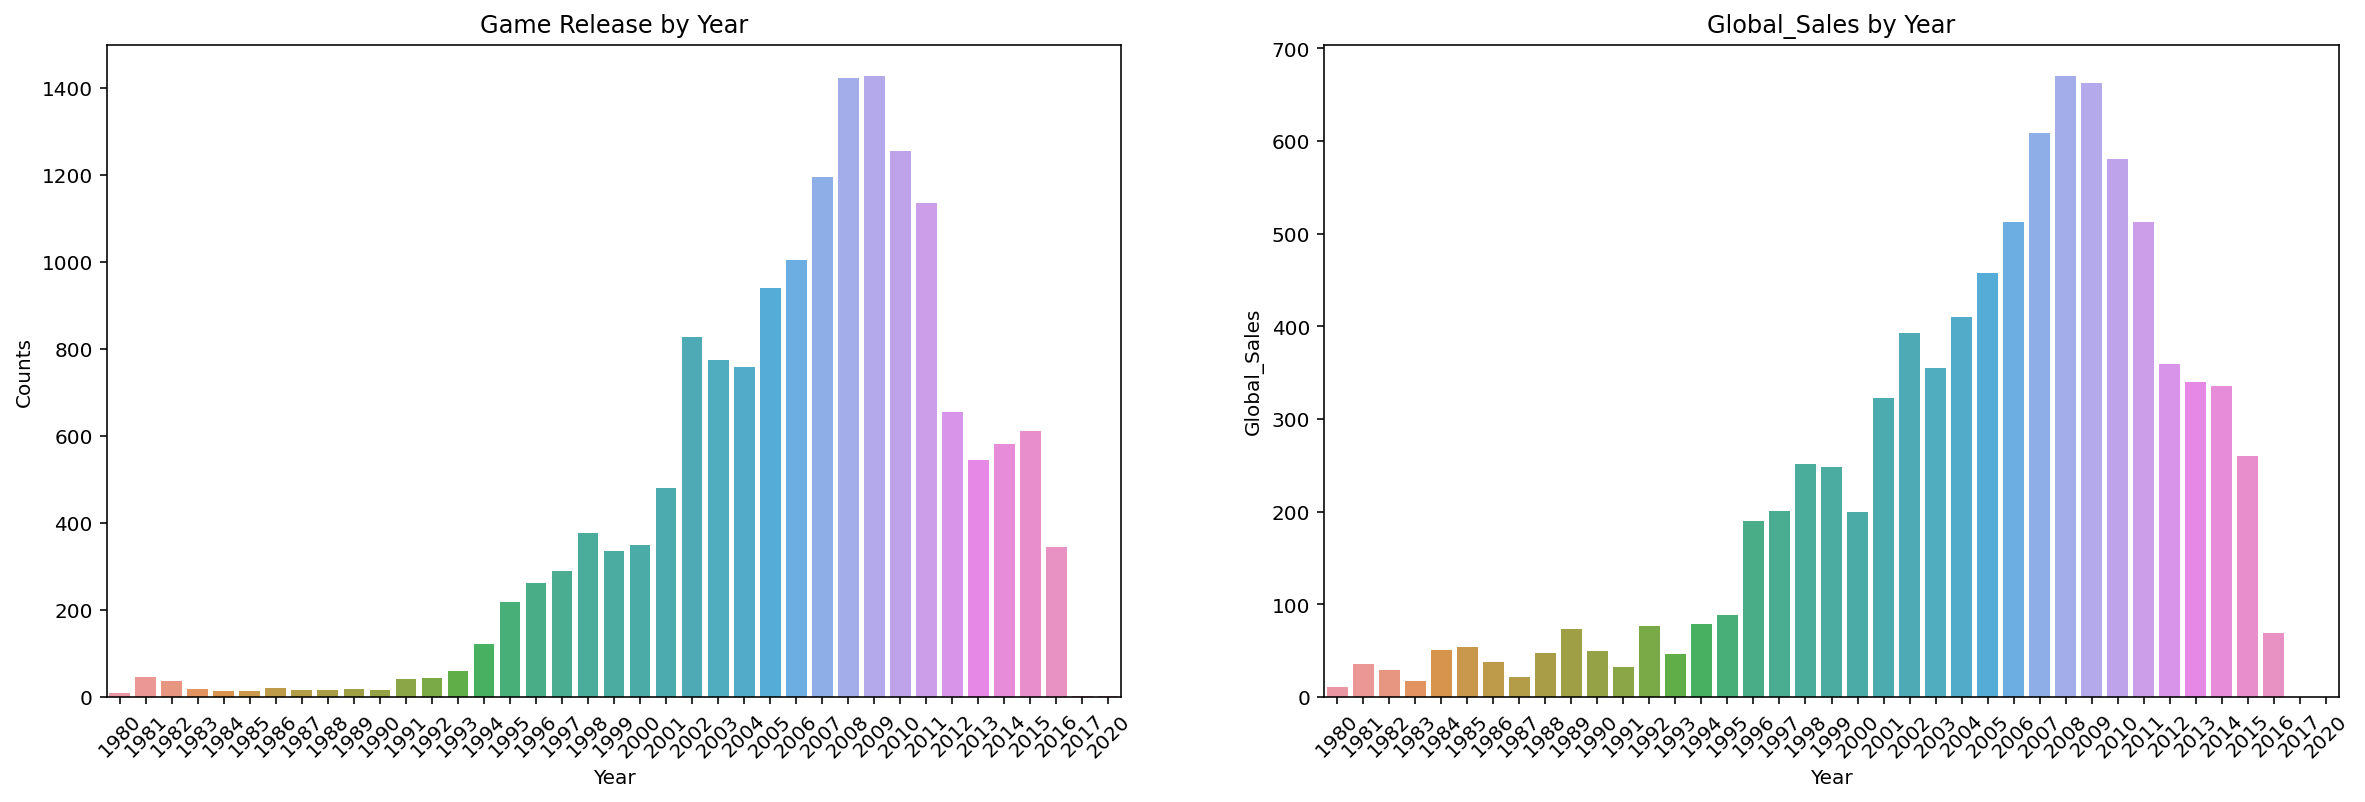

In [26]:
# Global Sales column 으로 barplot 그려보기

df_year_global = df.groupby(by = ['Year'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.barplot(data = df_year_counts, x = 'Year', y = 'Counts')
plt.xticks(rotation = 45)
plt.title('Game Release by Year')

plt.subplot(122)
sns.barplot(data=df_year_global, x = "Year", y = "Global_Sales")
plt.xticks(rotation = 45)
plt.title('Global_Sales by Year')
plt.show();

* 각 연도의 매출총합을 보기 위해 Global_Sales by Year을 그렸습니다.  
* 그러기 위해 groupby함수를 써서 Year을 기준으로 Global_Sales의 총합을 구했습니다.  
* 왼쪽의 Game Release by Year은 출시된 게임의 총수를 표현하는 그래프이고  
오른쪽의 Global_Sales by Year은 그 해당연도의 매출 총합을 표현하는 그래프입니다.  
각 연도마다 미세하게나마 차이는 보이나 상승하는 추세와 2008년, 2009년을 기점으로 감소하는 추세는 같게 보입니다.

In [27]:
# Genre와 Global Sales간의 barplot 그려보기

df_genre_global = df.groupby(by = ['Genre'])['Global_Sales'].sum().reset_index()
df_genre_global = df_genre_global.sort_values(by = ['Global_Sales'], ascending=False)

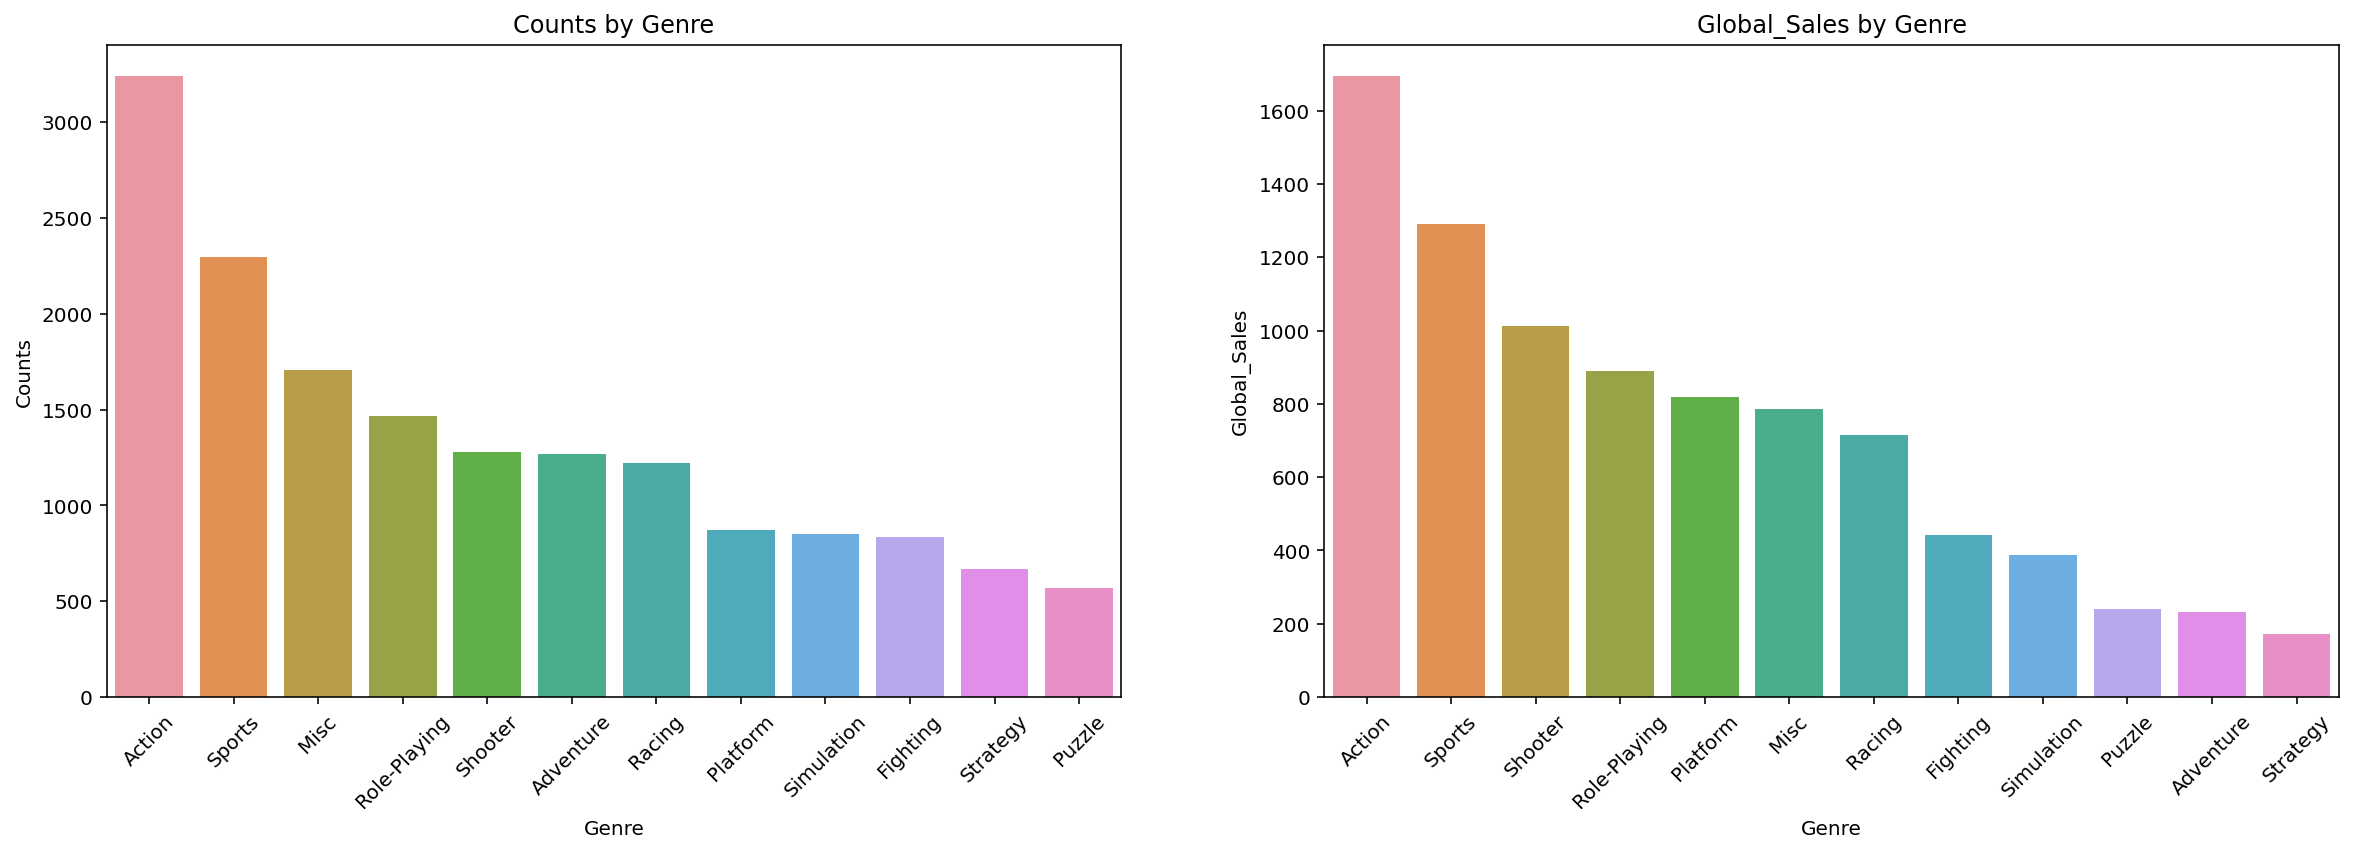

In [28]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.barplot(data = df_genre_counts, x = 'Genre', y = 'Counts')
plt.xticks(rotation = 45)
plt.title('Counts by Genre')

plt.subplot(122)
sns.barplot(data = df_genre_global, x = "Genre", y = "Global_Sales")
plt.xticks(rotation = 45)
plt.title('Global_Sales by Genre')
plt.show();

* 각 장르의 매출총합을 보기 위해 Global_Sales by Genre을 그렸습니다.  
* 그러기 위해 groupby함수를 써서 Genre을 기준으로 Global_Sales의 총합을 구했습니다.  
* 왼쪽의 Counts by Genre는 출시된 게임장르의 총수를 표현하는 그래프이고  
오른쪽의 Global_Sales by Genre은 그 장르의 매출 총합을 표현하는 그래프입니다.  
큰 순위의 변동 사항은 없으나, 3위와 5위는 변동이 있는 것으로 보입니다.

In [29]:
# 각 지역의 매출액의 합으로 각 지역 매출비율 알아보기

NA_Sales_sum = df['NA_Sales'].sum()
EU_Sales_sum = df['EU_Sales'].sum()
JP_Sales_sum = df['JP_Sales'].sum()
Other_Sales_sum = df['Other_Sales'].sum()

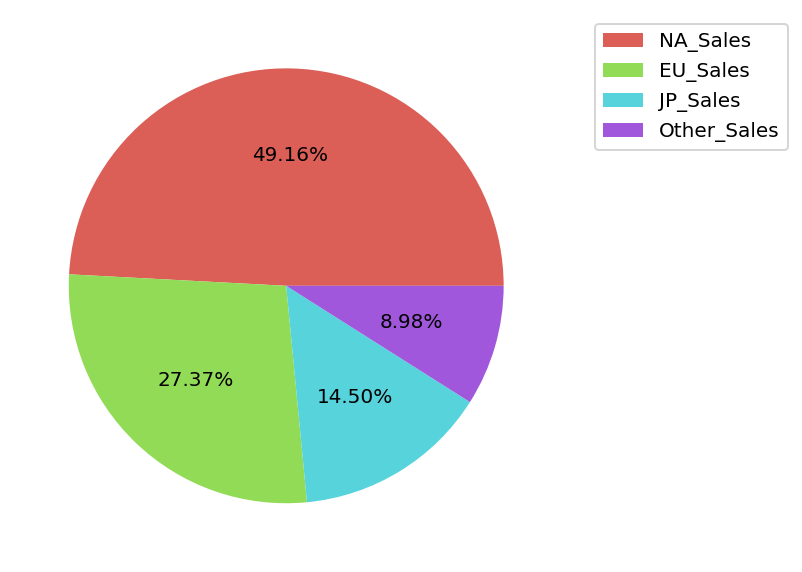

In [30]:
labels_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'] 
frequency_sum = [NA_Sales_sum, EU_Sales_sum, JP_Sales_sum, Other_Sales_sum]

colors_sum = sns.color_palette('hls', len(labels_sales)) 
 
plt.figure(figsize = (5, 5)) 

plt.pie(frequency_sum, autopct=lambda p : '{:.2f}%'.format(p), colors = colors_sum )
 
plt.legend(labels_sales, bbox_to_anchor=(1.05, 1))
plt.show();

* pieplot을 보게 되면 북미(NA)의 매출이 가장 많으며 세계콘솔게임 매출액의 50%가량을 차지하고 있는 것을 보이고 있습니다. 그 뒤로 유럽(EU), 일본(JP), 기타국가(Other)순으로 하고 있습니다.  
* 이를 보면 앞으로 개발하게 될 게임은 북미(NA)에 좀 더 가중치를 두고 고려 해야 하겠습니다.

In [48]:
# 각지역별 매출액의 연관성을 보기위해 pairplot그리기

df_pair = df.loc[:,['Year', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_pair.head()

,Year,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,2008,DS,Action,0.04,0.00,0.00,0.00
2,2009,Wii,Action,0.17,0.00,0.00,0.01
3,2010,PSP,Adventure,0.00,0.00,0.02,0.00
4,2010,DS,Misc,0.04,0.00,0.00,0.00
5,2010,PS3,Platform,0.12,0.09,0.00,0.04


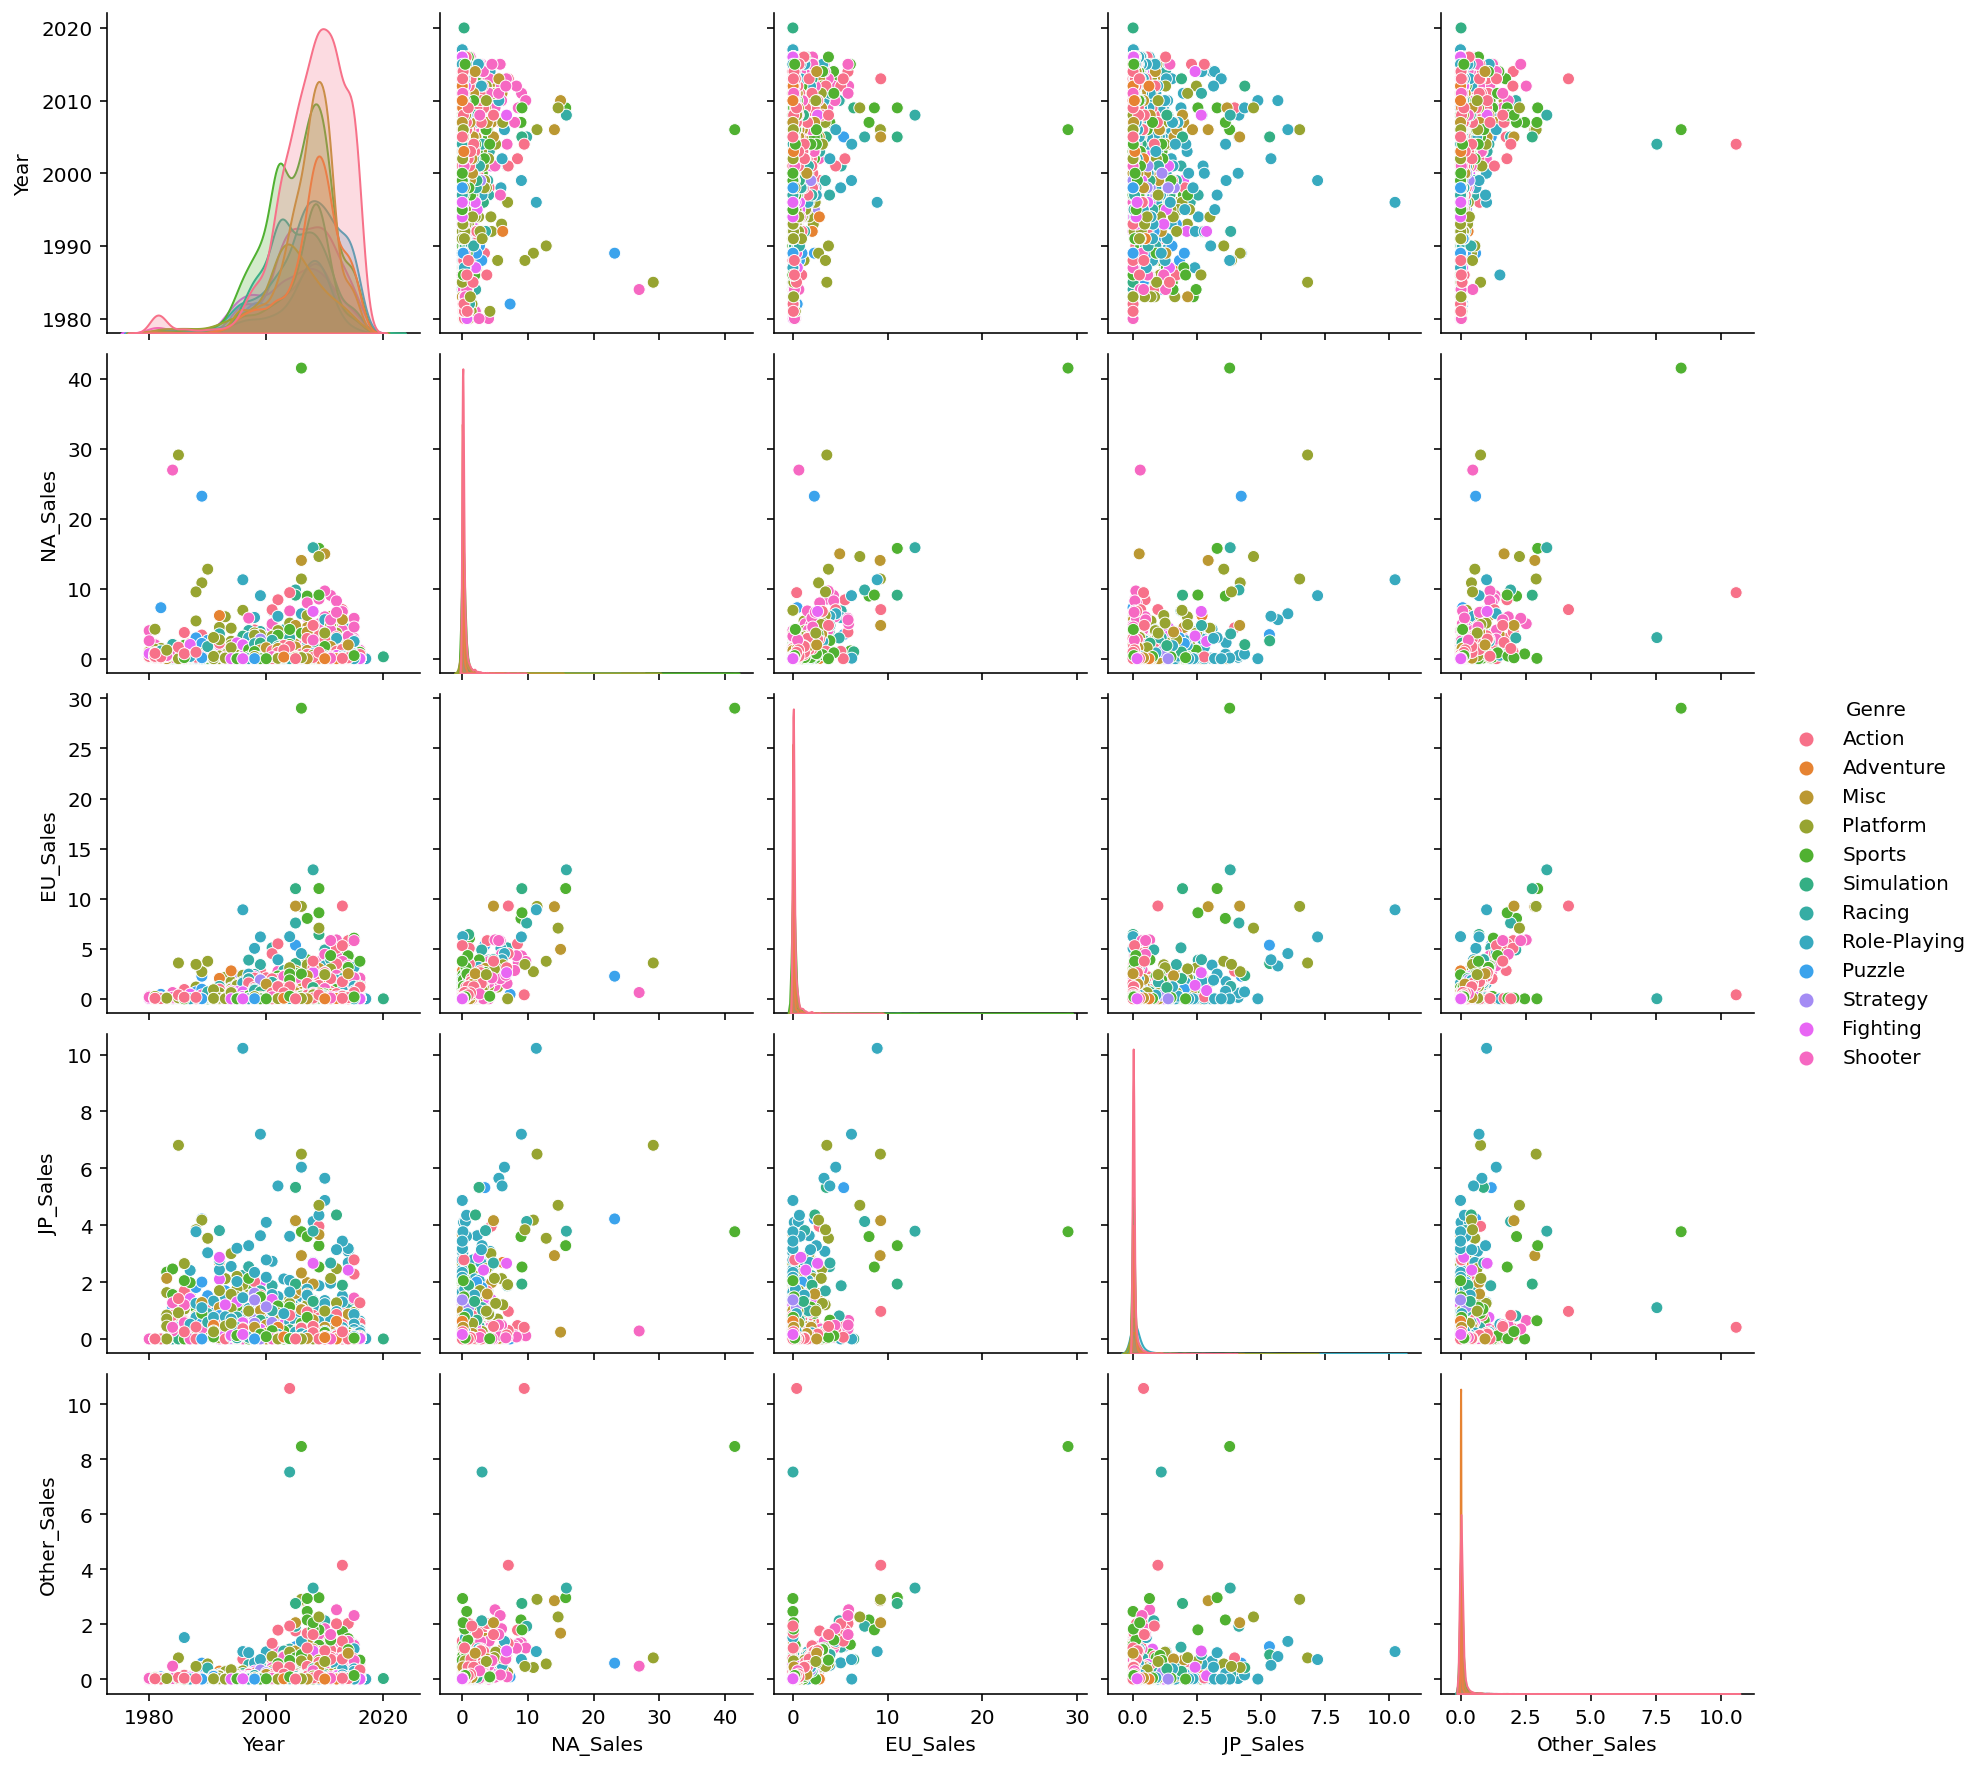

In [49]:
sns.pairplot(df_pair, hue = 'Genre')
plt.grid(True)
plt.show();

* 아래의 가설검정으로 확인하겠습니다.

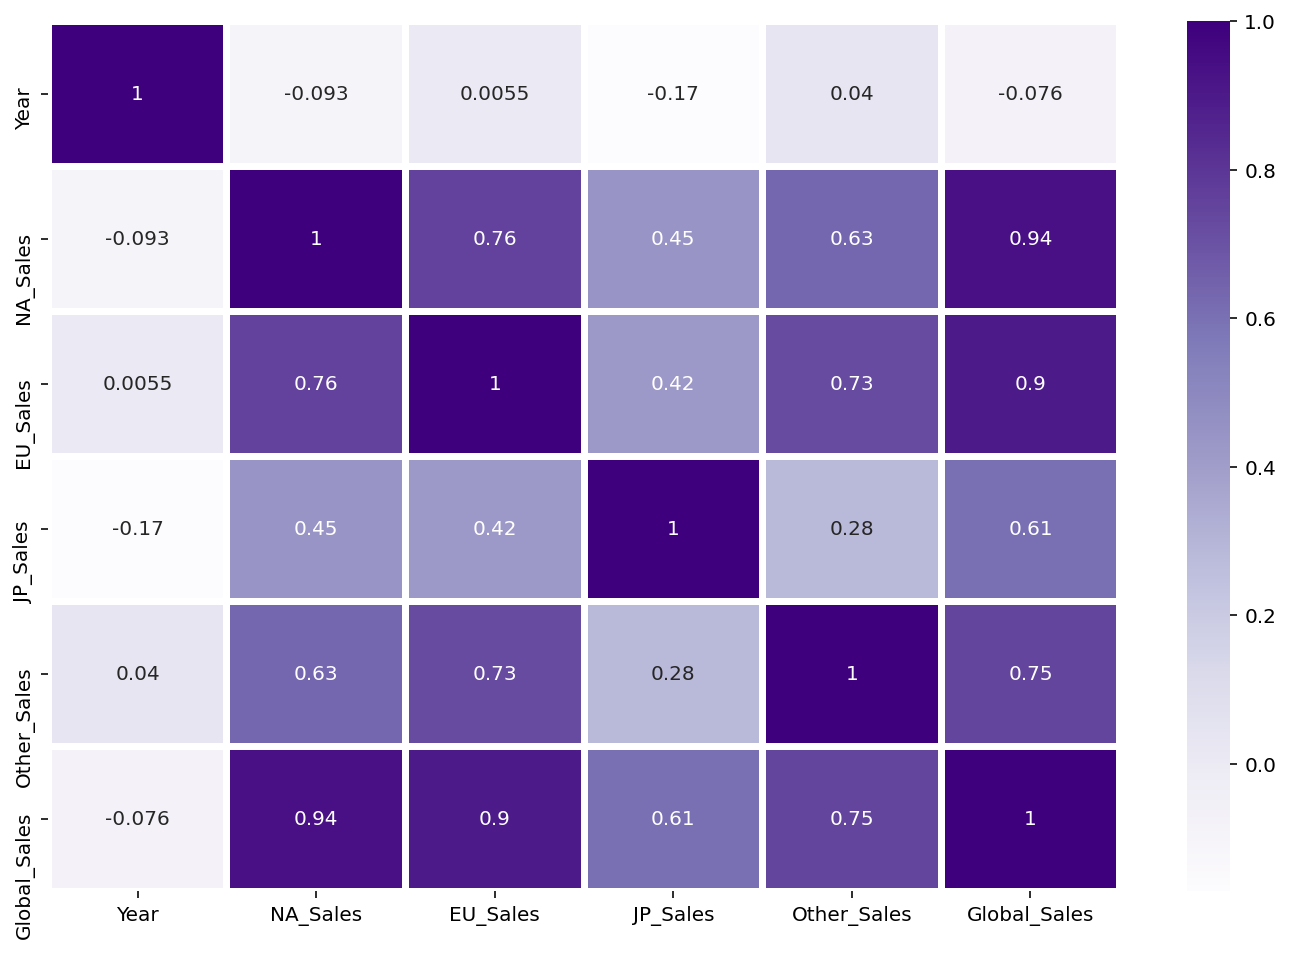

In [50]:
# 각 지역의 매출액의 상관관계를 알아보기 위한 Heatmap 그려보기

plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), cmap = 'Purples', annot=True, linewidth=3)
plt.show();

* 이 히트맵으로 우리가 알수 있는 중요한 사실은 Year과 다른 지역간 매출액의 상관관계입니다.  
* Year이 증가 할 수록 1980년에서 2020년이 될 수록 북미(NA), 일본(JP)음의 상관관계 즉, 감소함을 알 수 있고, 유럽(EU), 기타국가(Other)는 상승함을 알 수 있습니다. 하지만 전체합인 Global_Slaes는 **-0.076**만큰 감소하는 추세를 보입니다.  
* 이로써 해가 거듭할 수록 점점 콘솔게임의 시장 자체가 작아짐을 한번더 확인 할수 있습니다. 
* 아래의 가설검정과 기사에서 설명 하겠습니다.

* 각 지역의 매출액은 서로 관계가 있는지 확인 하려합니다.
* 가설 설정  
    * 귀무가설 : 각 지역의 매출액은 관계가 있다. 
    * 대립가설 : 각 지역의 매출액은 관계가 있지 않다.  


In [31]:
# 각 지역의 매출액의 상관관계를 알아보기 위한 가설검증

f_result = stats.f_oneway(df['NA_Sales'], df['EU_Sales'], df['JP_Sales'], df['Other_Sales'])
f, p = f_result.statistic.round(2), f_result.pvalue.round(2)
print("F검정통계량 : {}".format(f))
print("p-value : {}".format(p))

F검정통계량 : 562.2
p-value : 0.0


* 위의 결과 값을 보게되면 **P-value = 0**이므로 **귀무가설인 각 지역의 매출액은 관계가 있다.**는 기각하게 됩니다.  
따라서 **대립가설인 각 지역의 매출액은 관계가 있지 않다.**를 채택합니다.  
* 이 가설 검정으로 알수있듯이 우리는 각지역별로 따로 분리하지 않고 Global_Sales라는 합산으로 분석을하게 되어도 괜찮은 값을 도출 할 수 있다고 볼 수 있습니다.

# 3. 주요질문

### 3.1 지역에 따라서 선호하는 게임 장르가 다를까?

일단 두가지의 columns를 결정해야 합니다.  
1. 지역에 따라서 선호하는 $\Rightarrow$ 각 지역별 매출액  
2. 게임의 장르 $\Rightarrow$ Genre의 값  




In [35]:
# 각 지역간 장르의 매출액 보기

genre_sales = df.pivot_table(values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], index = 'Genre', aggfunc = 'sum')
genre_sales = genre_sales.reset_index()
genre_sales

,Genre,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
0,Action,510.83,1695.07,156.34,844.34,183.56
1,Adventure,63.66,233.46,51.87,101.43,16.50
2,Fighting,99.87,441.44,85.98,219.80,35.79
3,Misc,209.52,785.88,103.99,399.96,72.41
4,Platform,194.32,819.05,129.95,443.47,51.31
5,Puzzle,50.12,240.32,56.24,121.57,12.39
6,Racing,233.62,714.59,56.30,348.24,76.43
7,Role-Playing,181.52,890.71,334.98,318.37,55.84
8,Shooter,307.45,1011.77,38.16,564.70,101.46
9,Simulation,113.16,389.05,63.51,181.06,31.32


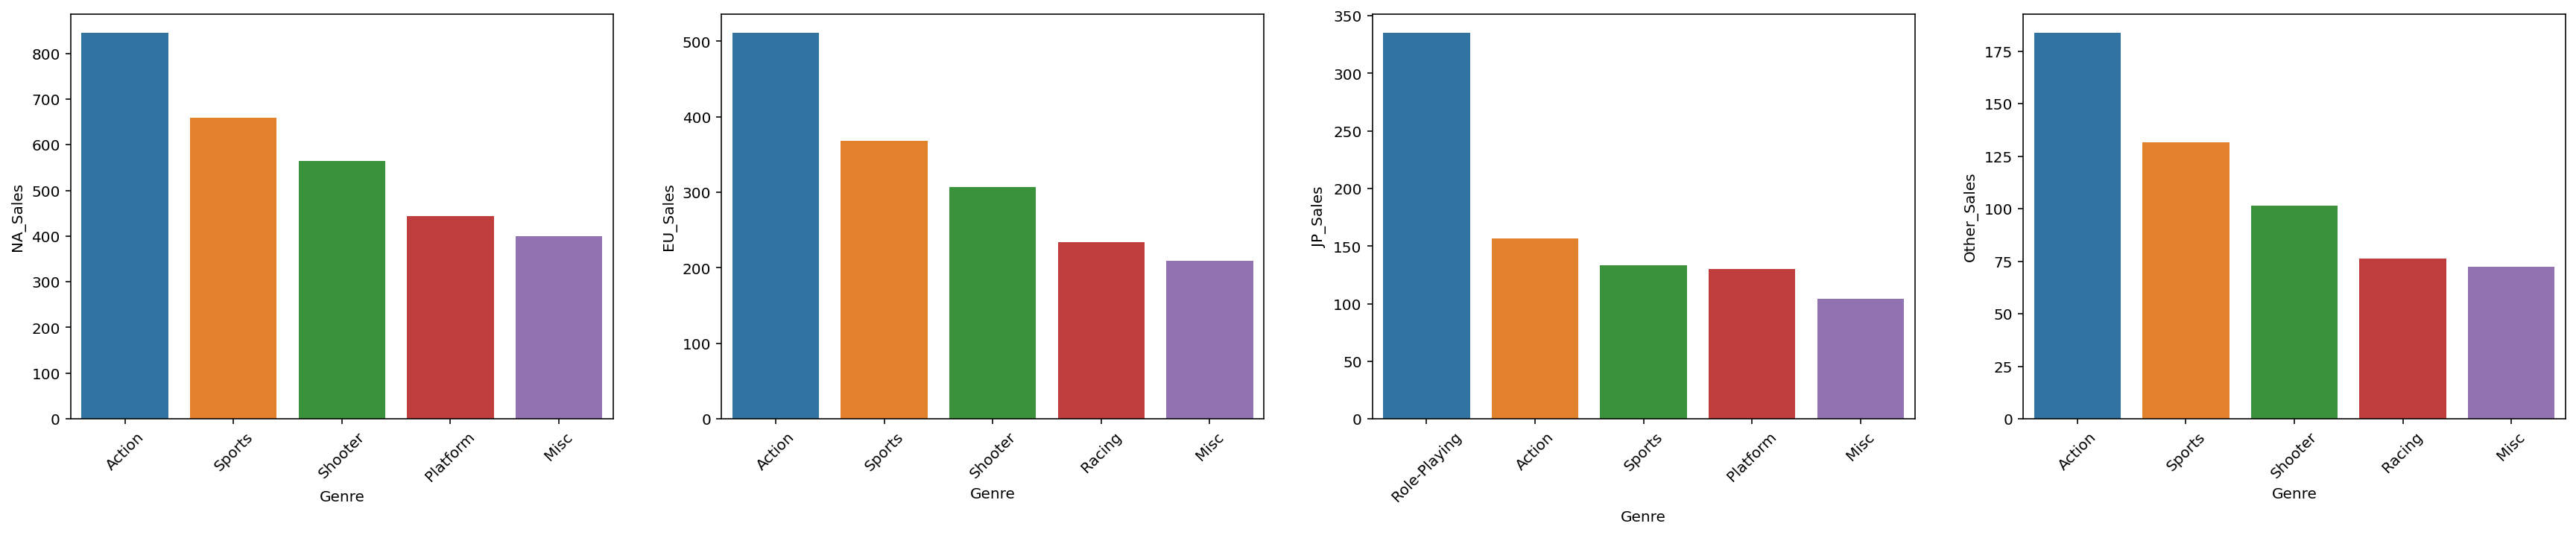

In [36]:
plt.figure(figsize=(30, 5))

plt.subplot(141)
sns.barplot(data = genre_sales.sort_values(['NA_Sales'], ascending = False).head(5), x = 'Genre', y = 'NA_Sales')
plt.xticks(rotation = 45)
plt.subplot(142)
sns.barplot(data = genre_sales.sort_values(['EU_Sales'], ascending = False).head(5), x = 'Genre', y = 'EU_Sales')
plt.xticks(rotation = 45)
plt.subplot(143)
sns.barplot(data = genre_sales.sort_values(['JP_Sales'], ascending = False).head(5), x = 'Genre', y = 'JP_Sales')
plt.xticks(rotation = 45)
plt.subplot(144)
sns.barplot(data = genre_sales.sort_values(['Other_Sales'], ascending = False).head(5), x = 'Genre', y = 'Other_Sales')
plt.xticks(rotation = 45)

plt.show();

* 각 지역별로 분석을 해보았습니다.  
    * 북미는 Action, Sports, Shooter, Platform, Misc 순입니다.  
    * 유렵은 Action, Sports, Shooter, Racing, Misc 순입니다.  
    * 일본은 Role-Playing, Action, Sports, Platform, Misc 순입니다.  
    * 기타국가는 Action. Sports, Shooter, Racing, Misc 순입니다.  

* 일본을 제외한 다른 지역들은 큰 차이가 없습니다. 4위정도가 다른 장르입니다.  
하지만 일본은 1위가 다른 지역에서 5위까지 보이지 않은 Role-Playing이라는 장르로 특이점을 가지고 있습니다.

### 3.2 연도별 게임의 트렌드가 있을까?

연도별 게임의 트렌드라 함은 주어진 자료로 2가지 정도로 생각해 볼 수 있습니다.
1. Platform에 따른 트렌드  
2. Genre에 따른 트렌드  

이렇게 두가지가 중요하다고 봅니다.  
Publisher는 단순 게임개발회사 혹은 발행회사정도로 판단 되므로 트렌드와는 상관이 없어 보이고  
게임을 어느 Platform으로 하는지 그리고 어떤 Genre를 많이 하는지가 가장 중요한 트렌드의 지표라 생각합니다.  
그리고 그 트렌드라고 생각하는 것은 많은 사람이 이용하는걸 얘기하는건데 주어진 데이터로는 매출액이 이용하는것과 같다고 볼 수 있습니다.

In [37]:
# Global_Sales과 Year, Platform을 한번에 보기위한 데이터 준비하기

year_sales_platform = df.pivot_table(values = 'Global_Sales', index = 'Year', columns = 'Platform', aggfunc = 'sum', fill_value = 0,
                                     margins = True)
year_sales_platform_top = year_sales_platform[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']].drop('All', axis=0)
year_sales_platform_top.tail(10)

Platform,PS2,X360,PS3,Wii,DS,PS
Year,,,,,,
2009,26.36,120.86,129.71,210.19,121.46,0.0
2010,5.12,163.29,144.06,121.03,87.05,0.0
2011,0.45,143.38,159.25,61.96,27.75,0.0
2012,0.00,99.31,108.07,22.78,10.80,0.0
2013,0.00,77.00,117.06,9.24,1.96,0.0
2014,0.00,36.43,50.88,4.43,0.02,0.0
2015,0.00,13.02,18.16,1.56,0.00,0.0
2016,0.00,0.83,2.55,0.00,0.00,0.0
2017,0.00,0.00,0.00,0.00,0.00,0.0


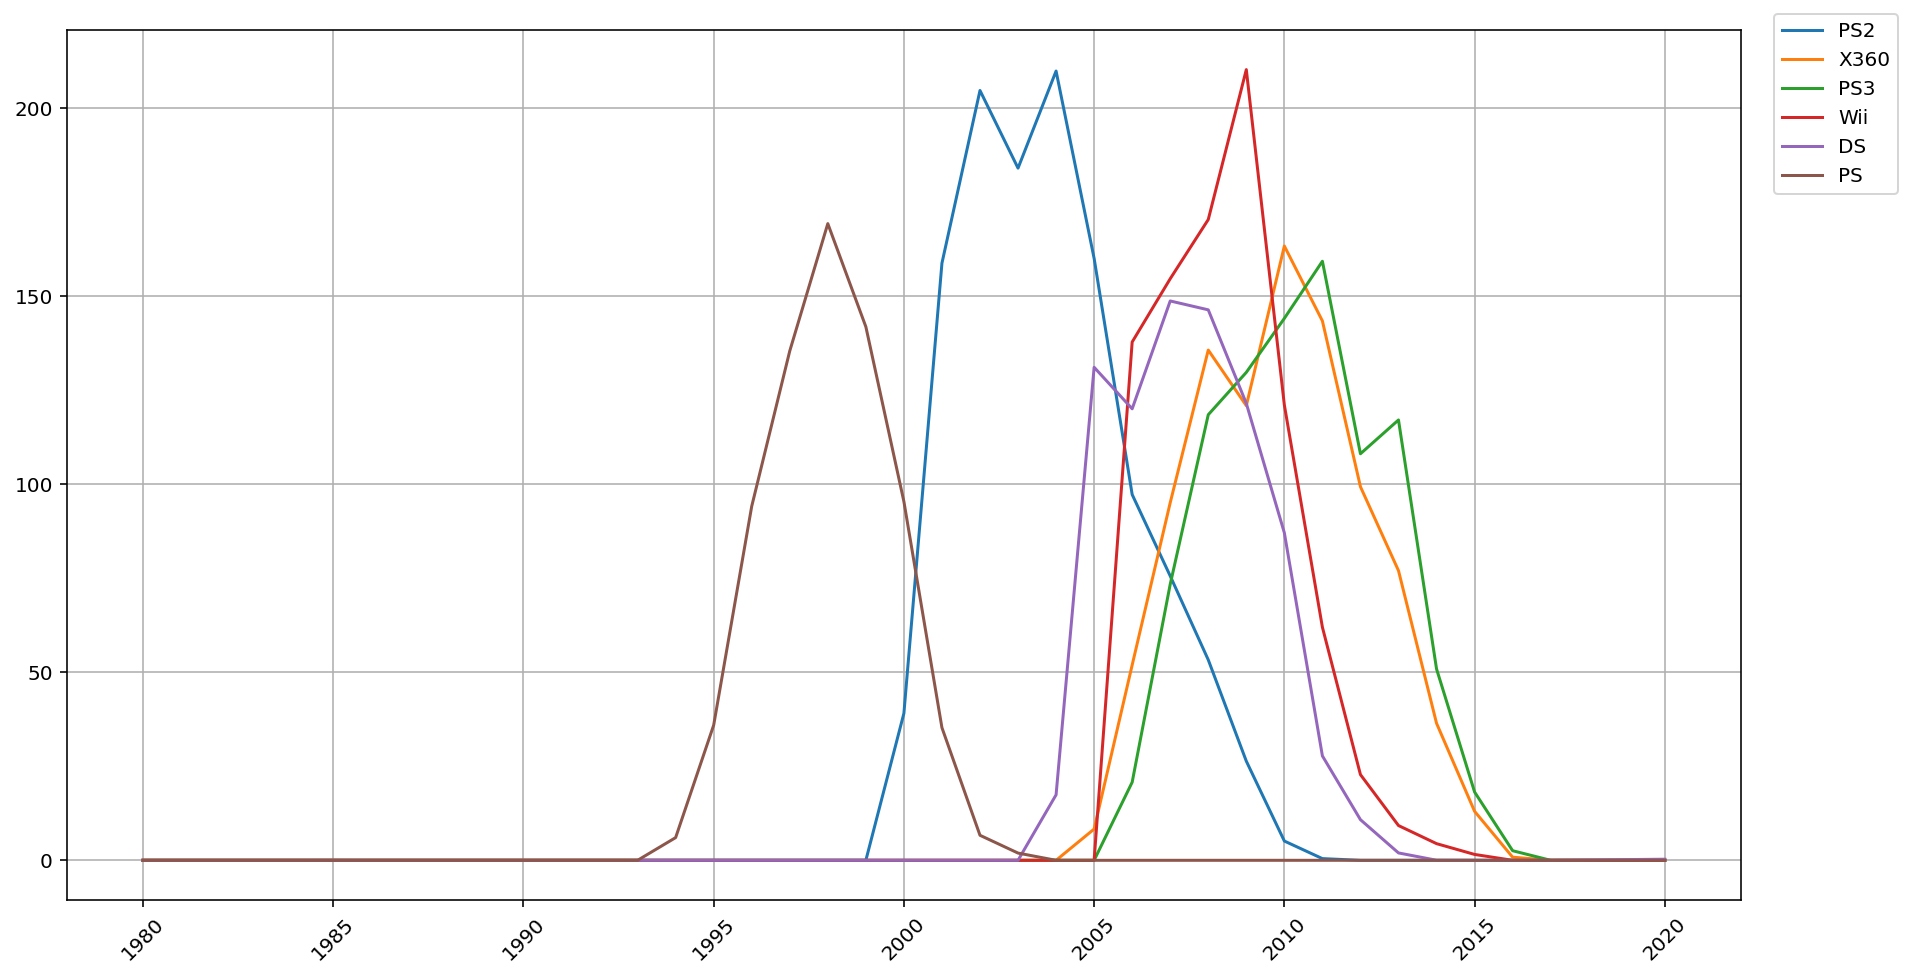

In [38]:
labels_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

plt.figure(figsize = (15, 8))
plt.plot(year_sales_platform_top)
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend(labels_platform, bbox_to_anchor=(1.1, 1.03))
plt.show();

|Platform|출시연도|
|:-:|:-:|
|PS2|2000년|
|x360|2005년|
|PS3|2006년|
|Wii|2006년|
|DS|2004년|
|PS|1994년|  

* Platform의 수가 많으므로 그래프가 지저분해질수 있어 위의 차트로 상위 6개의 Platform만을 가지고 그래프를 그렸습니다. 
* 그래프를 보면 알수 있듯이 출시된뒤 Platform 판매는 2~3년 정도 빤짝 하고 내리막을 가거나 PS같은 경우에는 차기 시리즈가 나오면  
자연스레 이전의 시리즈는 판매량이 감소 하는 것을 알 수 있습니다.  
* 이를 통해 만약 게임을 출시한다면 앞으로 나오게 될 Platform에 대한 정보가 있어 그 Platform으로 출시를 하거나 출시된지 1년이 채 안된 Platform을 이용하는 게임을 출시하는 것이 유리해 보입니다.

In [39]:
# Global_Sales과 Year, Genre을 한번에 보기위한 데이터 준비하기

year_sales_genre = df.pivot_table(values = 'Global_Sales', index = 'Year', columns = 'Genre', aggfunc = 'sum', fill_value = 0,
                                  margins = True)
year_sales_genre_top = year_sales_genre[['Action', 'Misc', 'Platform', 'Role-Playing', 'Shooter', 'Sports']].drop('All', axis=0)
year_sales_genre_top.tail(10)

Genre,Action,Misc,Platform,Role-Playing,Shooter,Sports
Year,,,,,,
2009,138.23,76.76,40.92,46.66,69.05,138.59
2010,117.21,88.19,30.92,69.63,70.39,90.64
2011,118.82,55.71,28.04,53.24,98.39,57.01
2012,118.82,22.56,18.56,47.71,72.84,30.84
2013,115.53,25.52,25.09,30.28,62.42,38.61
2014,98.99,23.73,8.87,45.89,64.24,46.51
2015,68.10,11.66,4.87,36.40,66.12,41.49
2016,19.78,1.15,2.08,6.75,16.81,14.35
2017,0.01,0.00,0.00,0.04,0.00,0.00


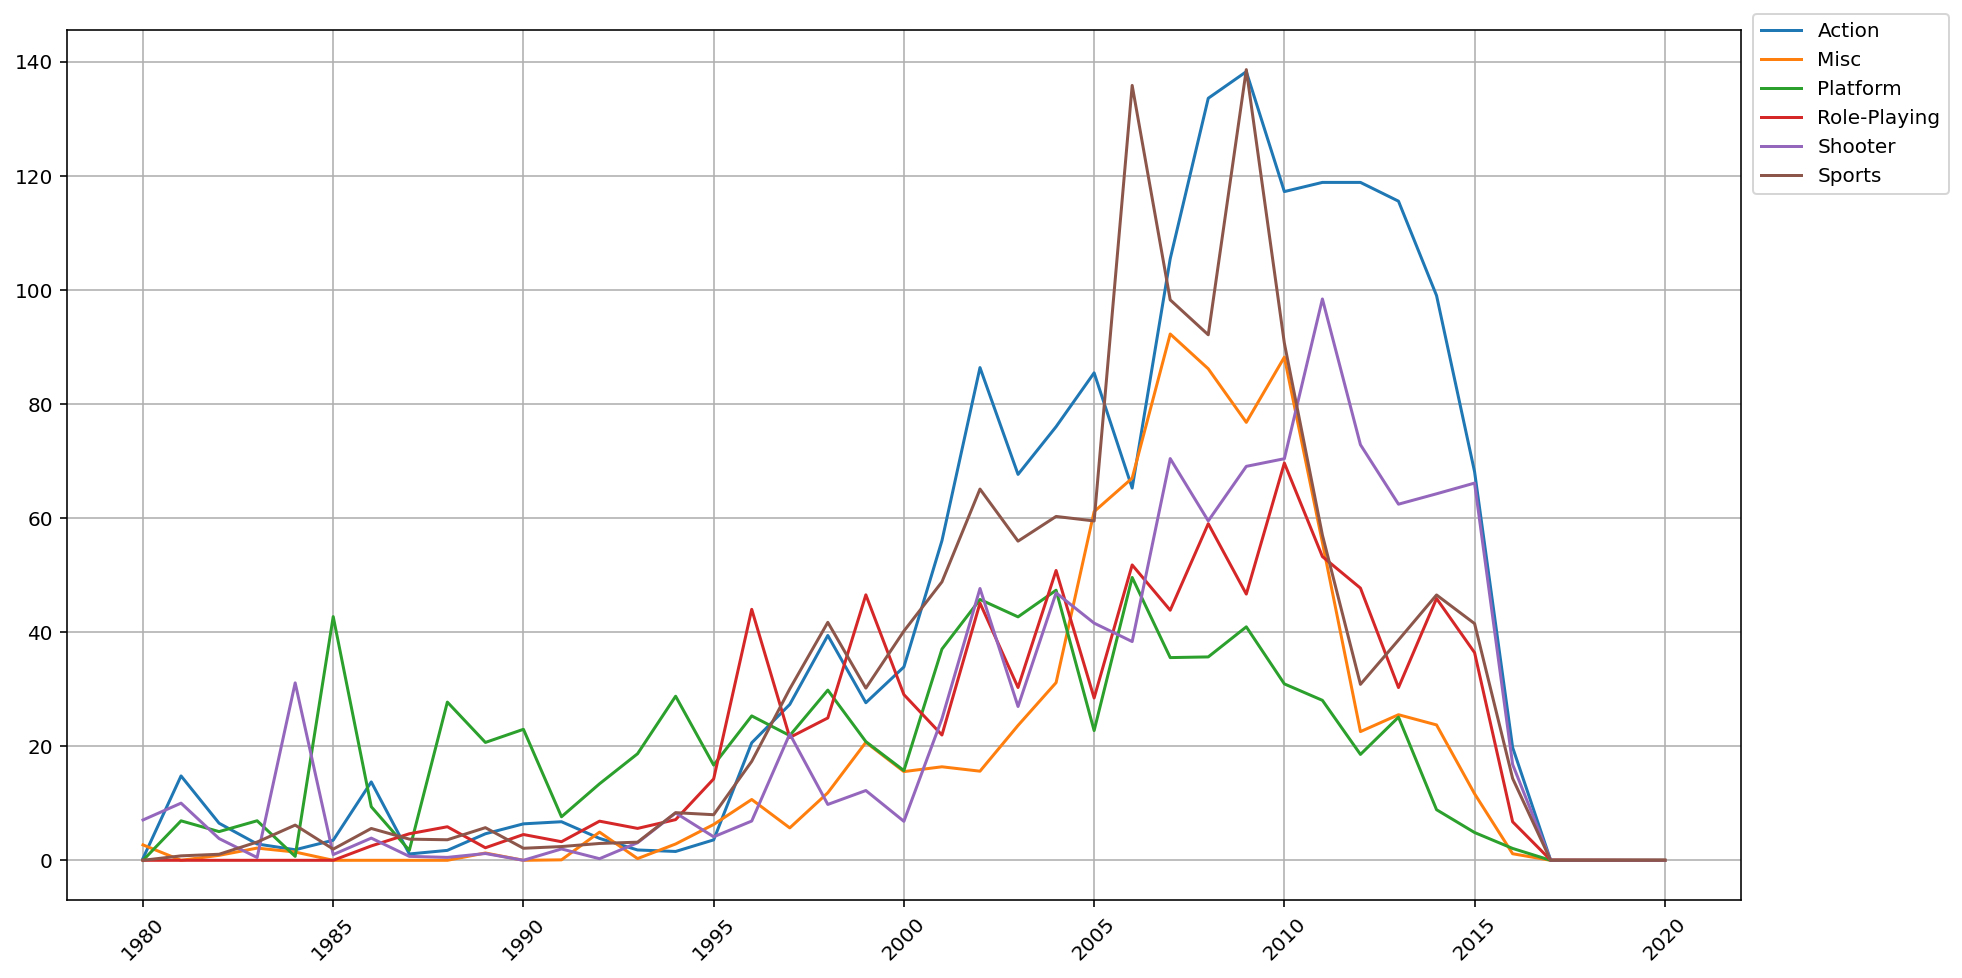

In [40]:
labels_genrn = ['Action', 'Misc', 'Platform', 'Role-Playing', 'Shooter', 'Sports']

plt.figure(figsize = (15, 8))
plt.plot(year_sales_genre_top)
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend(labels_genrn, bbox_to_anchor=(1.13, 1.03))
plt.show();

* **위의 heatmap을 포함하여 시각화 자료에 의해서 보여드린 콘솔게임 시장의 규모가 작아짐의 추가 설명입니다.**  

* 장르불문하고 2015년 까지 가파른 상승세를 보이는걸로 봐서 게임시장 자체의 규모가 커진걸 알수가 있습니다. 하지만 2010년 기점으로 감소하는 추세를 보이는데 이는 아래의 기사를 봐서 알 수 있듯이 PC, CONSOLE 등의 변동폭의 합이 MOBILE등의 변동폭 합보다 작기 때문에 PC, CONSOLE의 시장규모 자체가 작아졌음을 알수 있습니다.
<p align="center">
  <img src="https://newzoo.com/wp-content/uploads/2020/05/Newzoo_Games_Market_Revenues_2020.png" alt="Game Market"/>
</p>
<자료출처 https://newzoo.com>


### 3.3 매출이 높은 게임에 대한 분석 및 시각화 프로세스

In [41]:
# Global 매출액이 높은 순으로 보기위한 데이터 준비하기

df.sort_values(['Global_Sales'], axis=0, ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


* Globla_Sales를 살펴보면 Wii Platform에서 상위 3개의 순위를 차지 하고 있으나, 여기서 볼점은 Nintendo라는 Publisher에서 독점을 하고 있다는 것을 알 수 있습니다.

In [42]:
# NA 매출액이 높은 순으로 보기 위한 데이터 준비하기

df.sort_values(['NA_Sales'], axis=0, ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


* 북미(NA)의 매출액도 위의 글로벌 매출액과 비슷하게 흘러감을 볼 수 있습니다.  
* 여기서도 볼수 있듯 Platform의 변화는 있으나 Publisher는 Nintendo가 독점 함을 알수 있습니다.

In [43]:
# EU 매출액이 높은 순으로 보겠다.

df.sort_values(['EU_Sales'], axis=0, ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
11138,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
3484,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39


* 유렵(EU)의 매출액도 위와 비슷한 양상을 보이나 여기서는 Take-Two-Interactive라는 Publisher가 등장 했음을 볼수 있습니다만, 1위와의 격차 즉 Nintendo와의 격차가 상당함을 볼수 있습니다.

In [44]:
# JP 매출액이 높은 순으로 보기위한 데이터 준비

df.sort_values(['JP_Sales'], axis=0, ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9417,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10556,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35


* 일본(JP)은 게임과 그 게임들의 장르는 변했지만 역시나 Nintendo가 독점  함을 볼 수있습니다.

In [45]:
# Other 매출액이 높은 순으로 보기 위한 데이터 준비

df.sort_values(['Other_Sales'], axis=0, ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14670,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
14666,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.65
3484,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


* 기타지역(Other)은 위의 네가지 지역(글로벌, 북미, 유럽, 일본)과 전혀 다른 양상을 보이며 Nintendo의 독점 현상은 없어 보이나 2개의 순위를 차지 하고 있습니다.  
* 하지만 유럽(EU)의 매출액 순위에서 5위에 잠깐 보였던 Take-Two-Interactive라는 Publisher가 1위와 4위를 차지하는 모습을 보였습니다.

In [46]:
df_name_na = df.groupby(by = ['Name'])['NA_Sales'].sum().reset_index()
df_name_na = df_name_na.sort_values(by = ['NA_Sales'], ascending=False).head(5)

df_name_eu = df.groupby(by = ['Name'])['EU_Sales'].sum().reset_index()
df_name_eu = df_name_eu.sort_values(by = ['EU_Sales'], ascending=False).head(5)

df_name_jp = df.groupby(by = ['Name'])['JP_Sales'].sum().reset_index()
df_name_jp = df_name_jp.sort_values(by = ['JP_Sales'], ascending=False).head(5)

df_name_other = df.groupby(by = ['Name'])['Other_Sales'].sum().reset_index()
df_name_other = df_name_other.sort_values(by = ['Other_Sales'], ascending=False).head(5)

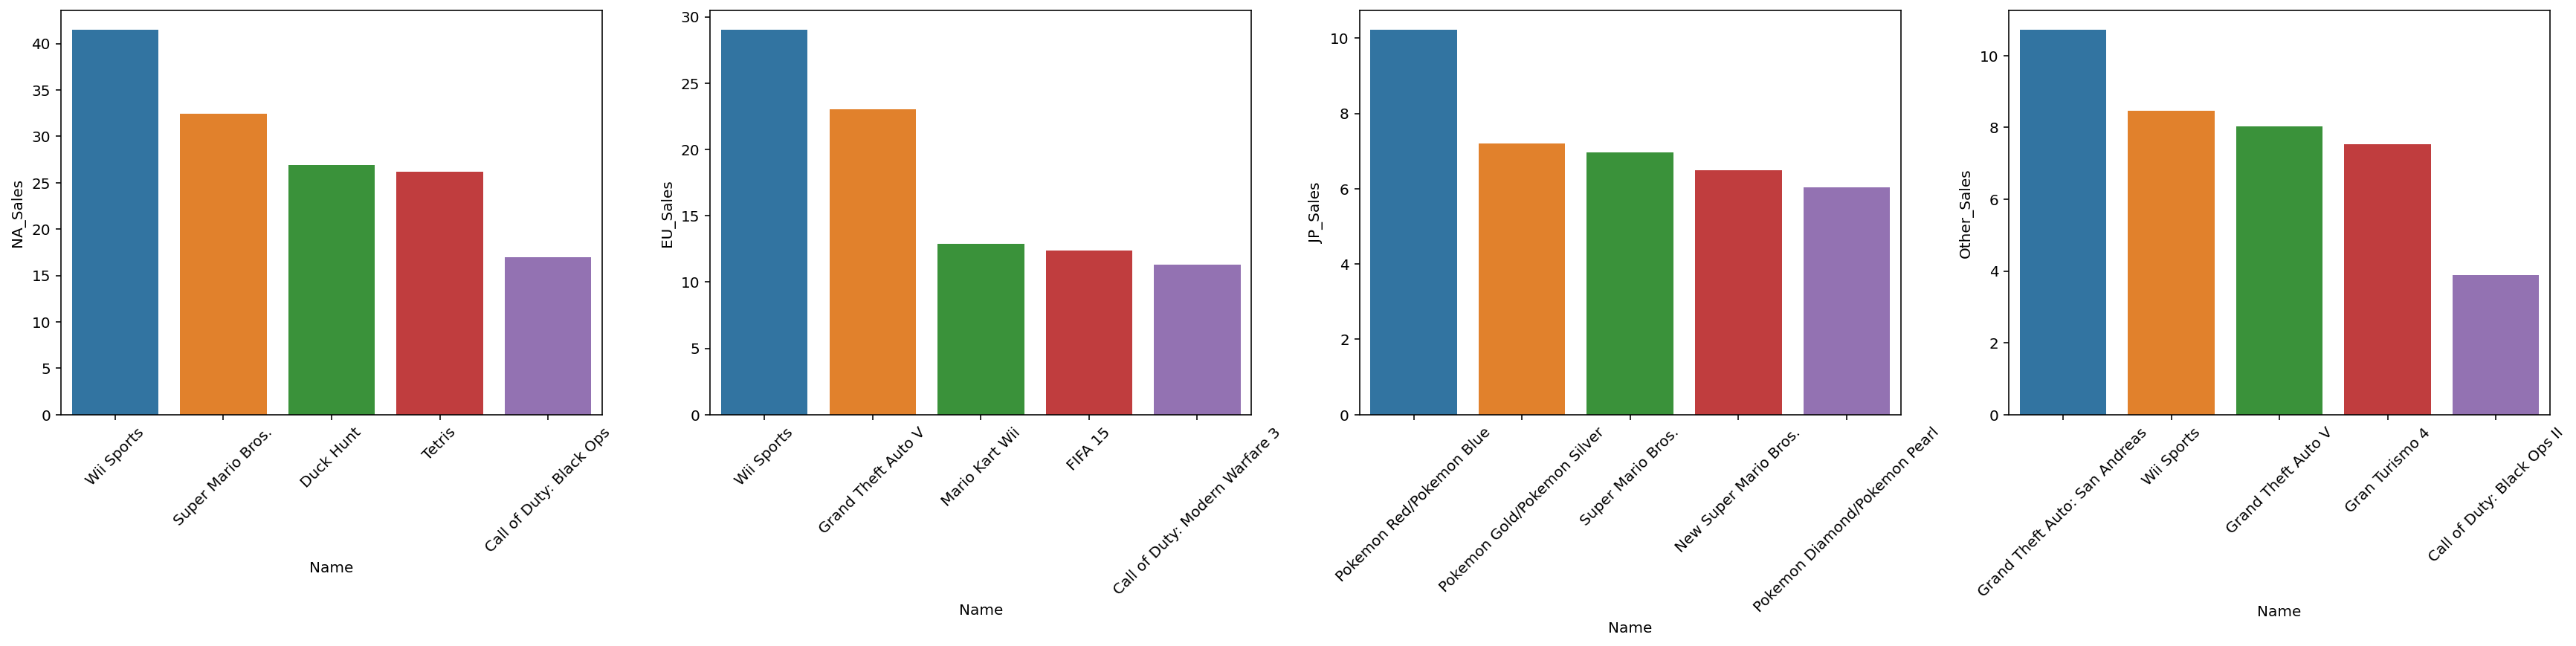

In [47]:
plt.figure(figsize=(30, 5))
plt.subplot(141)
sns.barplot(data = df_name_na, x = 'Name', y = 'NA_Sales')
plt.xticks(rotation = 45)
plt.subplot(142)
sns.barplot(data = df_name_eu, x = 'Name', y = 'EU_Sales')
plt.xticks(rotation = 45)
plt.subplot(143)
sns.barplot(data = df_name_jp, x = 'Name', y = 'JP_Sales')
plt.xticks(rotation = 45)
plt.subplot(144)
sns.barplot(data = df_name_other, x = 'Name', y = 'Other_Sales')
plt.xticks(rotation = 45)

plt.show();

|지역|1위 게임|장르|플랫폼|
|:-:|:-:|:-:|:-:|
|NA|Wii Sports|Sports|Wii|
|EU|Wii Sports|Sports|Wii|
|JP|Pokemon Red/Pokemon Blue|Role-Playing|GB|
|Other|Grand Theft Auto: San Andreas|Action|PS2|  

위 표와 같은 결과를 그래프로 볼 수 있습니다.

# 4. 다음 분기에 설계 해야할 게임  

* 각 지역 별  
    * 북미(NA)와 유럽(EU), 기타지역(Other)을 견향 했을 경우 : Action의 장르를 PS시리즈 Platform을 이용할 수 있게 출시 하는게 최선입니다.  
    * 일본(JP)을 견향 했을 경우 : Role-Playing의 장르를 GB나 PS시리즈 Platform을 이용할 수 있게 출시 하는게 최선입니다.  

* 세계를 견향했을 경우  
    * 북미(NA)가 전세계의 콘솔게임 시장의 50%가량을 점유하고 있고, 그외 유럽(EU), 기타지역(Other)또한 북미와 같은 추세를 따르고 있기 때문에 각 지역별과 같이 Action의 장르를 PS시리즈 Platform을 이용할 수 있게 출시 해야 합니다.  

* 다만, 최근 나온 Wii Sports가 인기를 얻고 있고 Wii Platform이 각종 차트에서 1위를 차지하고 있는 모습을 보이므로 Wii Sports와 같은 몸으로 경험할수 있는 게임들도 대비를 해야 합니다.  

### 마지막으로, 위의 NewZoo의 기사와 추세를 보건데 콘솔게임도 아직은 건재하고 매출액도 나오고 있는 상황이지만, 좀 더 미래를 본다면 모바일 게임 시장도 간과하면 안될것 같습니다.

        

